In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

from skimage.io import imread
from skimage.transform import resize
import os
import cv2
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [15]:
Categories = ['cats', 'dogs']
flat_data_arr = []  
target_arr = []  

In [17]:
main_datadir = r'C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_03'

In [18]:
for category in Categories:
    print(f'loading... category: {category}')

    # Specify the subdirectories for training and testing
    train_or_test_dirs = ['train', 'test']

    for train_or_test in train_or_test_dirs:
        # Form the complete path
        path = os.path.join(main_datadir, train_or_test, category)

        for img in os.listdir(path):
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array, (40, 40, 3))  # Adjust the size as needed
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(category))

        print(f'loaded {train_or_test} category: {category} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

loading... category: cats
loaded train category: cats successfully
loaded test category: cats successfully
loading... category: dogs
loaded train category: dogs successfully
loaded test category: dogs successfully


In [19]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(140, 4801)

In [20]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

In [22]:
param_grid={'C':[0.1,1,10,100],
			'gamma':[0.0001,0.001,0.1,1],
			'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [23]:
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [24]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"The model is {accuracy*100}% accurate")

The model is 50.0% accurate


In [25]:
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       0.50      0.36      0.42        14
         dog       0.50      0.64      0.56        14

    accuracy                           0.50        28
   macro avg       0.50      0.50      0.49        28
weighted avg       0.50      0.50      0.49        28



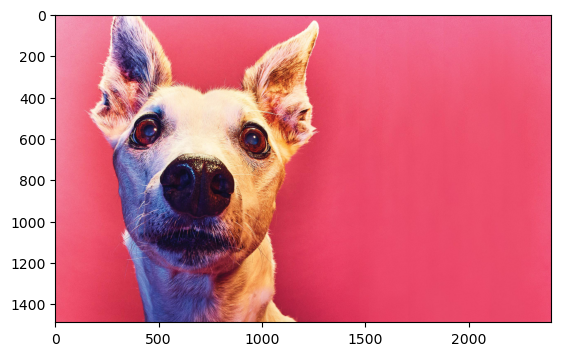

The predicted image is : dogs


In [28]:
path=r'C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_03\test\dogs\dog_28.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(40,40,3))
l=[img_resize.flatten()]
print("The predicted image is : "+Categories[model.predict(l)[0]])

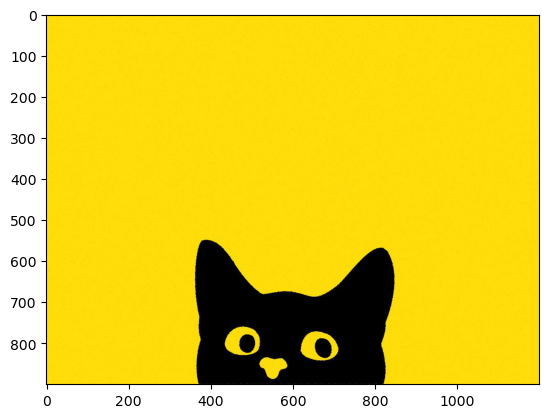

The predicted image is : dogs


In [29]:
path=r'C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_03\test\cats\cat_18.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(40,40,3))
l=[img_resize.flatten()]
print("The predicted image is : "+Categories[model.predict(l)[0]])